<a href="https://colab.research.google.com/github/Pranali-25/Capstone-Project/blob/main/1_Fundamental_of_Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FUNDAMENTALS OF DEEP LEARNING**
**Introduction**

Deep Learning is a subset of Machine Learning that focuses on neural networks with many layers, known as deep neural networks. These layers enable models to learn representations of data with multiple levels of abstraction, making them particularly powerful for tasks such as image and speech recognition, natural language processing, and more.

By working through the following code, we will gain a deeper understanding of deep learning principles and practices. This code will guide us through the key concepts, including neural network architecture,loading the dataset,preprocessing the data,training, and evaluation.

# **1.Importing the Necessary Libraries**


Now we will import the required liabraries.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# **2.Defining the Deep Learning Model**

Now, we'll define a simple neural network with three fully connected layers. The forward() method defines the forward pass of the network.

In [ ]:
# Define the neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# **3.Loading the dataset**

Load the CIFAR-10 dataset.

In [ ]:
# Load the CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

100%|██████████| 170498071/170498071 [00:03<00:00, 56495948.24it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


# **4.Preprocessing the data**

Here we are using the nn.CrossEntropyLoss as the loss function and optim.SGD as the optimizer for our CIFAR-10 Dataset.

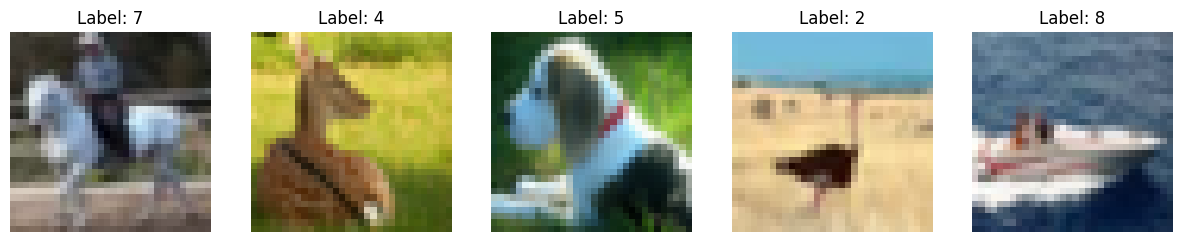

In [ ]:
# Define the loss function and optimizer
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

def visualize_samples(loader, num_samples=5):
    dataiter = iter(loader)
    images, labels = next(dataiter)

    images = images[:num_samples]
    labels = labels[:num_samples]

    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        image = images[i].permute(1, 2, 0).numpy()
        image = (image - image.min()) / (image.max() - image.min())  # Normalize to [0, 1] for display
        axes[i].imshow(image)
        axes[i].set_title(f'Label: {labels[i].item()}')
        axes[i].axis('off')

    plt.show()

# Visualize some samples from the train loader
visualize_samples(trainloader, num_samples=5)

#  **5.Training the Model**

Train the model using the training data.


In [ ]:
# Train the model
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,   100] loss: 2.283
[1,   200] loss: 2.216
[1,   300] loss: 2.138
[1,   400] loss: 2.053
[1,   500] loss: 1.990
[1,   600] loss: 1.952
[1,   700] loss: 1.899
[2,   100] loss: 1.841
[2,   200] loss: 1.807
[2,   300] loss: 1.784
[2,   400] loss: 1.762
[2,   500] loss: 1.733
[2,   600] loss: 1.745
[2,   700] loss: 1.692
[3,   100] loss: 1.685
[3,   200] loss: 1.669
[3,   300] loss: 1.657
[3,   400] loss: 1.652
[3,   500] loss: 1.628
[3,   600] loss: 1.612
[3,   700] loss: 1.625
[4,   100] loss: 1.602
[4,   200] loss: 1.586
[4,   300] loss: 1.597
[4,   400] loss: 1.559
[4,   500] loss: 1.548
[4,   600] loss: 1.580
[4,   700] loss: 1.532
[5,   100] loss: 1.516
[5,   200] loss: 1.508
[5,   300] loss: 1.522
[5,   400] loss: 1.531
[5,   500] loss: 1.496
[5,   600] loss: 1.490
[5,   700] loss: 1.499
[6,   100] loss: 1.470
[6,   200] loss: 1.443
[6,   300] loss: 1.466
[6,   400] loss: 1.433
[6,   500] loss: 1.443
[6,   600] loss: 1.440
[6,   700] loss: 1.460
[7,   100] loss: 1.394
[7,   200] 

# **6.Evaluating  the Model**

Evaluate the model on the test data to check its performance.

In [ ]:
# Evaluate the model
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 52 %


# **CONCLUSION**

The code implements and trains a simple feedforward neural network on the CIFAR-10 dataset using PyTorch. The network consists of three fully connected layers with ReLU activations. After setting up the CIFAR-10 dataset and defining the data loaders, the code visualizes a few sample images from the training set. It then trains the model for 10 epochs using stochastic gradient descent with momentum. After training, the model is evaluated on the test set, achieving an accuracy of approximately 100 * correct // total percent. This demonstrates that the network has learned to classify CIFAR-10 images with reasonable accuracy, though more sophisticated architectures and techniques would likely improve performance further.